# Brasilian ECommerce Dataset by Olist

In [3]:
import pandas as pd
df = pd.read_csv('data/olist_order_payments_dataset.csv')  # Replace 'table_dataset.csv' with the path to your actual table dataset file

duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


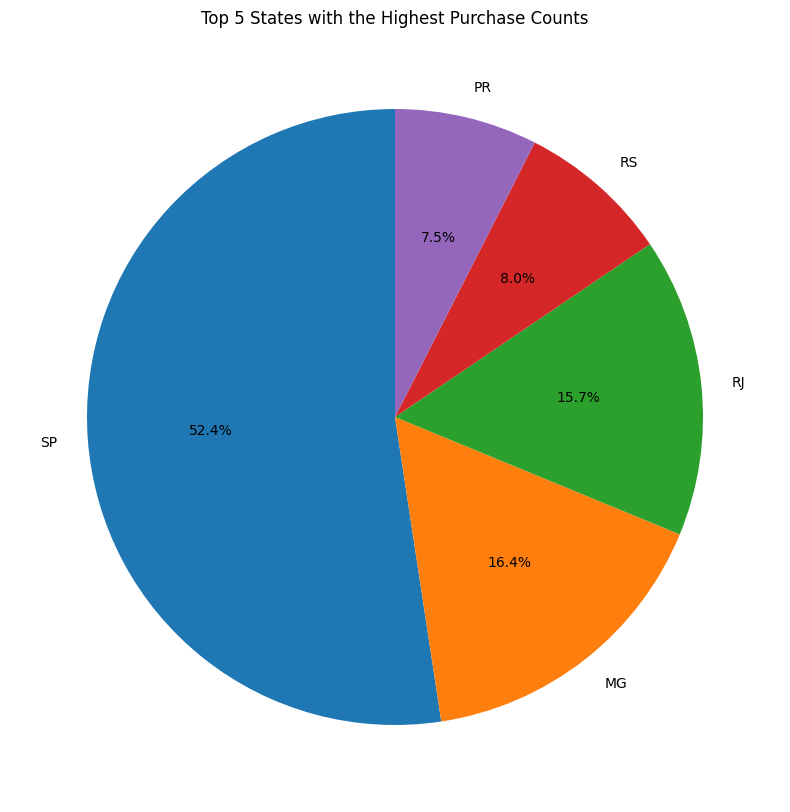

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

geo_data = pd.read_csv('data/olist_geolocation_dataset.csv')

state_counts = geo_data['geolocation_state'].value_counts()
top_states = state_counts.head(5)  

plt.figure(figsize=(10, 10))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 States with the Highest Purchase Counts')
plt.show()


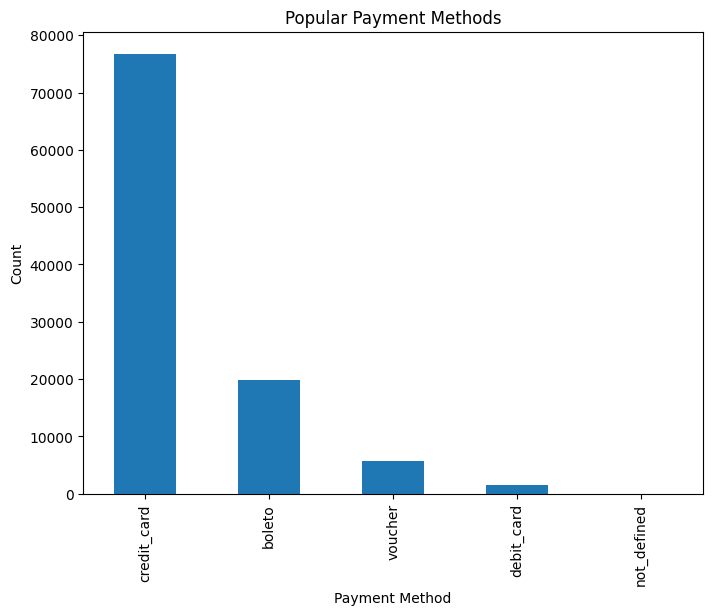

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

order_payments_data = pd.read_csv('data/olist_order_payments_dataset.csv')

# Popular payment methods
popular_payment_methods = order_payments_data['payment_type'].value_counts()

plt.figure(figsize=(8, 6))
popular_payment_methods.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Popular Payment Methods')
plt.show()


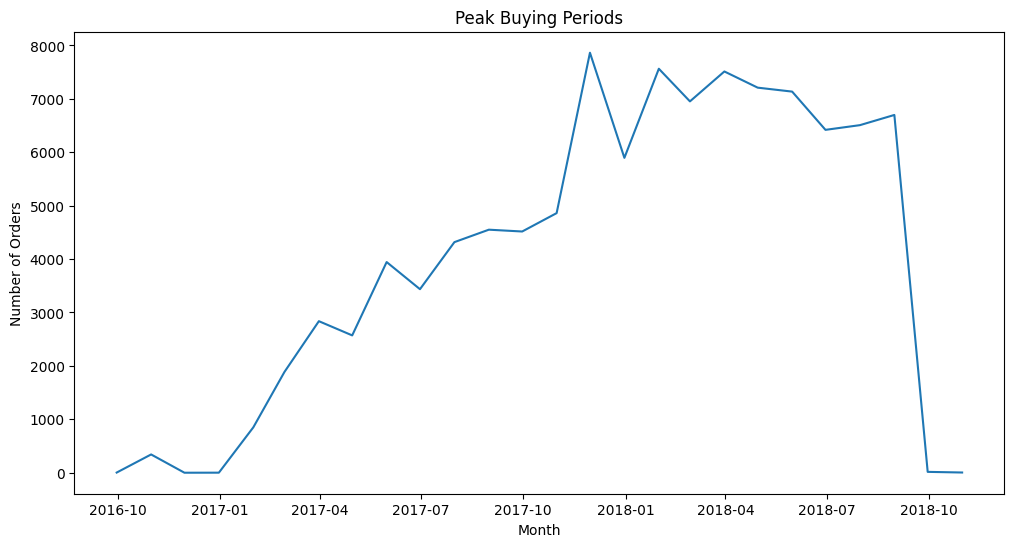

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

orders_data = pd.read_csv('data/olist_orders_dataset.csv')
order_payments_data = pd.read_csv('data/olist_order_payments_dataset.csv')

merged_data = pd.merge(orders_data, order_payments_data, on='order_id')

merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

merged_data.set_index('order_purchase_timestamp', inplace=True)

monthly_orders = merged_data.resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_orders)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Peak Buying Periods')
plt.show()

